Jobsheet 1 Praktek Filter dan Jendela

<ipython-input-1-3e1e699456ce>:7: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(np.arange(-4, L+4, step=1), h, use_line_collection=True)


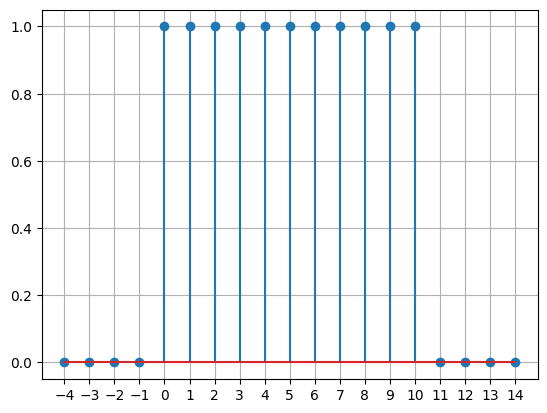

In [1]:
import numpy as np
import matplotlib.pyplot as plt

L=11
h = np.concatenate((np.zeros(4),np.ones(L),np.zeros(4)),axis=0)
plt.figure()
plt.stem(np.arange(-4, L+4, step=1), h, use_line_collection=True)
plt.xticks(np.arange(-4, L+4, step=1))
plt.grid();

Hasil dari code ini adalah plot dari jendela rectangular dengan panjang 11, di mana terdapat 11 nilai satu di tengah, dikelilingi oleh empat nilai nol di kedua sisi.








interactive(children=(IntSlider(value=16, description='L', max=128, min=2), Checkbox(value=False, description=…

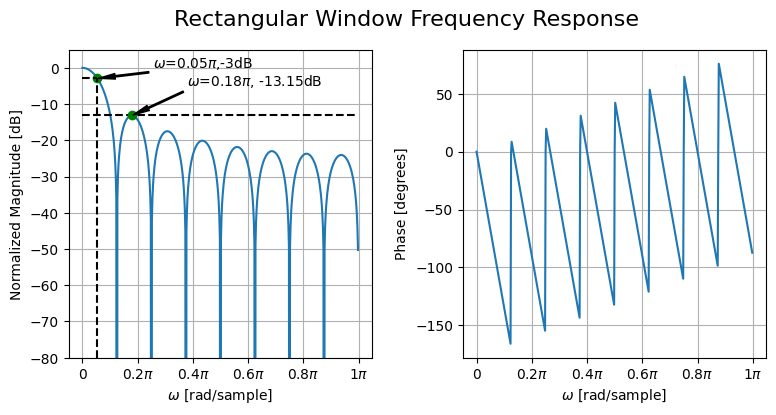

In [2]:
from ipywidgets import interact
import ipywidgets as widgets
from matplotlib.ticker import FuncFormatter, MultipleLocator
from scipy.signal import argrelextrema
import scipy.signal as signal
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,4))
fig.suptitle('Rectangular Window Frequency Response', fontsize=16)
plt.subplots_adjust(wspace=0.3)

@interact(L=widgets.IntSlider(min=2, max=128, step=1, value=16),unwrap=False)
def plot_recWindow_H(L=16, unwrap=False):
    h = np.concatenate((np.ones(L),np.zeros(4)),axis=0)
    omega, H =signal.freqz(h[:-4],worN=512)
    H[np.abs(H) < np.finfo(float).eps] = np.finfo(float).eps
    H_dB=20*np.log10(np.abs(H)/np.abs(H).max())
    p3dB=np.max(H_dB)-3
    p3dBIndex= np.max(np.where(H_dB >= p3dB))
    wp=omega[p3dBIndex]
    Hp=H_dB[p3dBIndex]
    ax1.clear()
    ax1.plot(omega, H_dB)
    ax1.plot(wp, Hp,'go')
    ax1.plot((0, wp), (Hp, Hp), 'k--')
    ax1.plot((wp, wp), (-80, Hp), 'k--')
    ax1.set_ylim((-80,H_dB.max()+5))
    ax1.annotate(r'$\omega$={:.2f}$\pi$,-3dB'.format(wp/np.pi), xy=(wp, Hp), xytext=(wp+0.2*np.pi, 0),
            arrowprops=dict(facecolor='black', shrink=0.02, width=1, headwidth=4),)
    if L!=2:
        side_lobe=argrelextrema(np.abs(H), np.greater)[0][0]
        ax1.plot((0, omega[-1]),(H_dB[side_lobe],H_dB[side_lobe]), 'k--')
        ax1.annotate(r'$\omega$={:.2f}$\pi$, {:.2f}dB'.format(omega[side_lobe]/np.pi,H_dB[side_lobe]),
                     xy=(omega[side_lobe], H_dB[side_lobe]), xytext=(omega[side_lobe]+0.2*np.pi, -5),
                    arrowprops=dict(facecolor='black', shrink=0.02, width=1, headwidth=4),)
        ax1.plot(omega[side_lobe], H_dB[side_lobe],'go')

    ax1.xaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'))
    ax1.xaxis.set_major_locator(MultipleLocator(base=0.2*np.pi))
    ax1.grid(True)
    ax1.set_xlabel(r'$\omega$ [rad/sample]')
    ax1.set_ylabel(r'Normalized Magnitude [dB]')


    ax2.clear()
    phase=np.angle(H,deg=True)
    if unwrap:
        phase=np.unwrap(phase)
    ax2.plot(omega,phase)
    ax2.xaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'))
    ax2.xaxis.set_major_locator(MultipleLocator(base=0.2*np.pi))
    ax2.grid(True)
    ax2.set_xlabel(r'$\omega$ [rad/sample]')
    ax2.set_ylabel(r'Phase [degrees]')

Dengan menggunakan widget interaktif yang disediakan, pengguna dapat mengubah panjang jendela jendela rectangular serta memilih untuk melihat atau menyembunyikan respons fase yang telah di-unwrap. Ini memungkinkan pengguna untuk lebih memahami karakteristik dari jendela rectangular dalam domain frekuensi dan fase.

In [3]:
from sympy import sin, symbols, simplify, pi, lambdify, limit

wc_s = symbols('\omega_c')
n_s, L_s = symbols('n L', integer=True)

n_d_s=(L_s-1)/2
h_n_s=sin(wc_s*(n_s-n_d_s))/(pi*(n_s-n_d_s))
h_n_s

sin(\omega_c*(-L/2 + n + 1/2))/(pi*(-L/2 + n + 1/2))

Hasil dari code ini adalah ekspresi matematika dari fungsi jendela sinc dalam domain waktu diskrit, yang digunakan untuk menganalisis karakteristik jendela rectangular dalam konteks sinyal diskrit.

In [4]:
h_0_s = limit(h_n_s,n_s,n_d_s)
h_0_s

\omega_c/pi

Hasil dari code ini adalah nilai konstan dari fungsi jendela sinc pada titik sentralnya, yang menunjukkan nilai dari jendela sinc pada posisi tengahnya dalam domain waktu diskrit. Ini sering kali merupakan nilai yang signifikan dalam analisis sinyal dan sistem.

interactive(children=(IntSlider(value=16, description='L', max=128, min=2), FloatSlider(value=0.5, description…

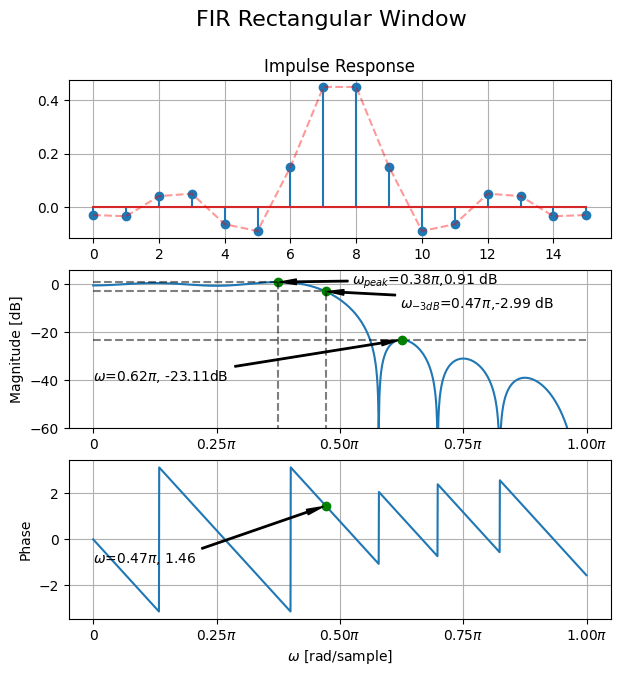

In [5]:
h_n=lambdify((wc_s,n_s,L_s), h_n_s, 'numpy')

fig1, (ax1, ax2,ax3) = plt.subplots(3, 1, figsize=(7,7))
fig1.suptitle('FIR Rectangular Window', fontsize=16)
plt.subplots_adjust(wspace=0.3)


@interact(L=widgets.IntSlider(min=2, max=128, step=1, value=16),
          wc=widgets.FloatSlider(min=0.1, max=1, step=0.01, value=0.5), unwrap=False)
def plot_h(L=16, wc=0.5,unwrap=False):
    wc=wc*np.pi
    n=np.arange(L)
    n_d=n_d_s.subs(L_s,L).evalf()
    if L%2==0:
        h=h_n(wc,n,L)
    else:
        h=np.ones(L)
        for i in range(L):
            if i==n_d:
                h[i]=wc/np.pi
            else:
                h[i]=h_n(wc,i,L)
    ax1.clear()
    ax1.stem(h, use_line_collection=True)
    ax1.plot(h,'r--',alpha=0.4)
    ax1.set_title(r'Impulse Response')
    ax1.grid()

    omega, H =signal.freqz(h,worN=2048)
    H[np.abs(H) < np.finfo(float).eps] = np.finfo(float).eps
    H_dB=20*np.log10(np.abs(H))
    p3dB=-3
    p3dBIndex_down= np.max(np.where(H_dB >= p3dB))
    p3dBIndex_up= np.min(np.where(H_dB <= p3dB))
    print(H_dB[p3dBIndex_down])
    print(H_dB[p3dBIndex_up])
    if (np.abs(p3dB-H_dB[p3dBIndex_down]) >= np.abs(p3dB-H_dB[p3dBIndex_up])):
        p3dBIndex=p3dBIndex_up
    else:
        p3dBIndex=p3dBIndex_down
    wp=omega[p3dBIndex]
    Hp=H_dB[p3dBIndex]
    max_peak_ind=np.argmax(H_dB)

    ax2.clear()
    ax2.plot(omega, H_dB)
    ax2.plot(omega[max_peak_ind], H_dB[max_peak_ind],'go')
    ax2.plot((0, omega[max_peak_ind]), (H_dB[max_peak_ind], H_dB[max_peak_ind]), 'k--',alpha=0.5)
    ax2.plot((omega[max_peak_ind], omega[max_peak_ind]), (-80, H_dB[max_peak_ind]), 'k--',alpha=0.5)
    ax2.annotate('$\omega_{{peak}}$={:.2f}$\pi$,{:.2f} dB'.format(omega[max_peak_ind]/np.pi,H_dB[max_peak_ind]),
                 xy=(omega[max_peak_ind],H_dB[max_peak_ind]), xytext=(omega[max_peak_ind]+0.15*np.pi, 0),
            arrowprops=dict(facecolor='black', shrink=0.02, width=1, headwidth=4))
    ax2.plot(wp, Hp,'go')
    ax2.plot((0, wp), (Hp, Hp), 'k--', alpha=0.5)
    ax2.plot((wp, wp), (-80, Hp), 'k--',alpha=0.5)
    ax2.set_ylabel(r'Magnitude [dB]')
    ax2.grid()
    ax2.set_ylim((-60,H.max()+5))
    ax2.xaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.2f}$\pi$'.format(val/np.pi) if val !=0 else '0'))
    ax2.xaxis.set_major_locator(MultipleLocator(base=0.25*np.pi))
    ax2.annotate(r'$\omega_{{-3dB}}$={:.2f}$\pi$,{:.2f} dB'.format(wp/np.pi,Hp), xy=(wp, Hp), xytext=(wp+0.15*np.pi, -10),
            arrowprops=dict(facecolor='black', shrink=0.02, width=1, headwidth=4),)
    if L!=2:
        side_lobe=argrelextrema(np.abs(H[p3dBIndex:]), np.greater)[0][0]+p3dBIndex
        ax2.plot((0, omega[-1]),(H_dB[side_lobe],H_dB[side_lobe]), 'k--',alpha=0.5)
        ax2.annotate(r'$\omega$={:.2f}$\pi$, {:.2f}dB'.format(omega[side_lobe]/np.pi,H_dB[side_lobe]),
                     xy=(omega[side_lobe], H_dB[side_lobe]), xytext=(0, -40),
                    arrowprops=dict(facecolor='black', shrink=0.02, width=1, headwidth=4),)
        ax2.plot(omega[side_lobe], H_dB[side_lobe],'go')

    ax3.clear()
    phase=np.angle(H, deg=False)
    if unwrap:
        phase=np.unwrap(phase)
        print('Delay={:.2f}'.format(phase[p3dBIndex]/wp))
    ax3.plot(omega,phase)
    ax3.xaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.2f}$\pi$'.format(val/np.pi) if val !=0 else '0'))
    ax3.xaxis.set_major_locator(MultipleLocator(base=0.25*np.pi))
    ax3.grid(True)
    ax3.set_xlabel(r'$\omega$ [rad/sample]')
    ax3.set_ylabel(r'Phase')
    ax3.plot(wp, phase[p3dBIndex],'go')
    ax3.annotate(r'$\omega$={:.2f}$\pi$, {:.2f}'.format(wp/np.pi,phase[p3dBIndex]),
                     xy=(wp, phase[p3dBIndex]), xytext=(0, -1),
                    arrowprops=dict(facecolor='black', shrink=0.02, width=1, headwidth=4),)

Hasil dari code ini adalah plot interaktif dari jendela FIR rectangular bersama dengan respons frekuensi dan fase-nya. Pengguna dapat mengatur panjang jendela dan frekuensi cut-off serta memilih untuk melihat atau menyembunyikan respons fase yang telah di-unwrap, sehingga memungkinkan eksplorasi yang lebih interaktif terhadap karakteristik jendela FIR rectangular.

Jobsheet 2 Praktek Filter dan Jendela

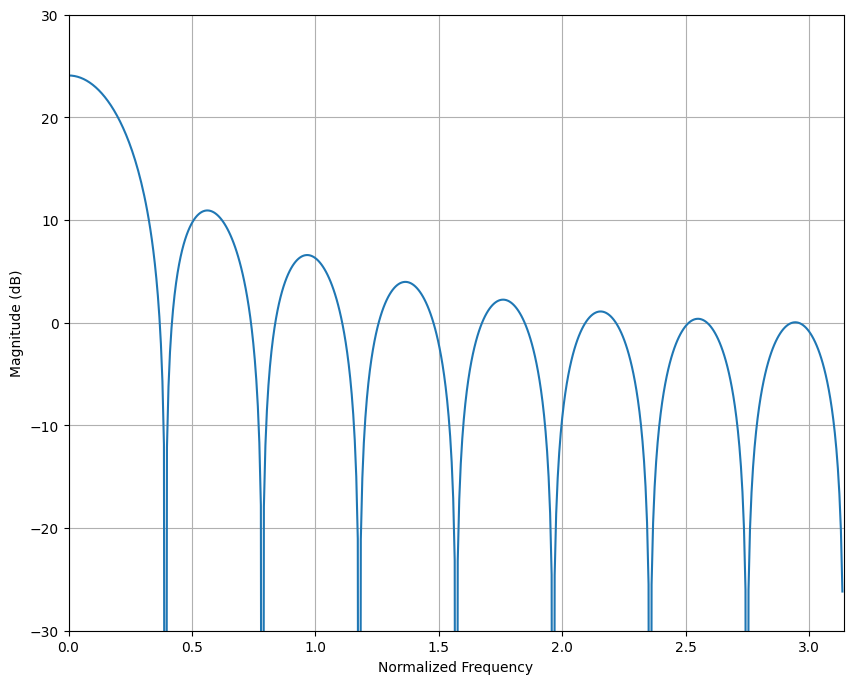

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

h=np.ones(16);
omega, H =signal.freqz(h)
plt.figure(figsize=(10,8))
plt.plot(omega, 20*np.log10(abs(H)+1e-6))
plt.axis([0, 3.14, -30, 30])
plt.xlabel('Normalized Frequency')
plt.ylabel('Magnitude (dB)')
plt.grid()

Hasil dari code ini adalah plot dari respons frekuensi sebuah jendela FIR rectangular dengan panjang 16 dalam domain frekuensi. Plot ini menunjukkan bagaimana jendela rectangular merespon terhadap berbagai frekuensi, yang berguna dalam analisis dan desain filter.

In [7]:
import numpy as np
import scipy.signal as signal

def errfunc(h):
    numfreqsamples=512

    #desired passband:
    pb=int(numfreqsamples/4.0)
    #desired transition band:
    tb=int(numfreqsamples/8.0)

    w, H = signal.freqz(h,1,numfreqsamples)
    H_desired=np.concatenate((np.ones(pb),np.zeros(numfreqsamples-pb)))
    weights = np.concatenate((np.ones(pb),np.zeros(tb), 1000*np.ones(numfreqsamples-pb-tb)))
    err = np.sum(np.abs(H-H_desired)*weights)
    return err

Hasil dari code ini adalah sebuah fungsi errfunc(h) yang mengembalikan nilai kesalahan (error) antara respon frekuensi dari filter FIR yang diberikan dengan respon frekuensi yang diinginkan, dengan menggunakan bobot yang diterapkan pada setiap sampel frekuensi.

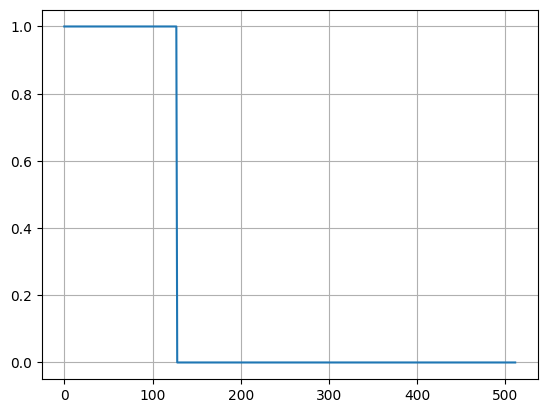

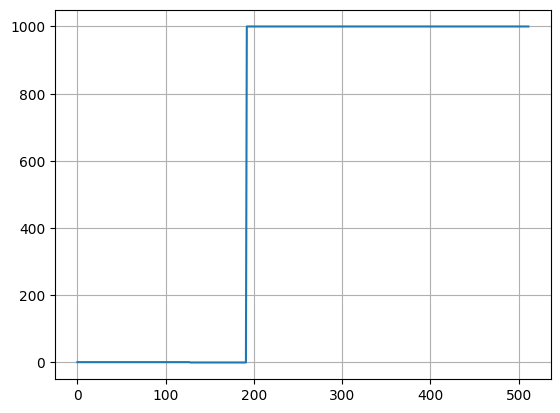

In [8]:
import matplotlib.pyplot as plt
import numpy as np

numfreqsamples=512

#desired passband:
pb=int(numfreqsamples/4.0)
#desired transition band:
tb=int(numfreqsamples/8.0)

# See H_Desired
plt.figure()
plt.plot(np.concatenate((np.ones(pb),np.zeros(numfreqsamples-pb))))
plt.grid()

plt.figure()
plt.plot(np.concatenate((np.ones(pb),np.zeros(tb), 1000*np.ones(numfreqsamples-pb-tb))))
plt.grid()

Hasil dari code ini adalah visualisasi dari respon yang diinginkan dari filter FIR yang akan dibuat, dengan menunjukkan bagaimana bobot diterapkan pada berbagai bagian dari respon frekuensi yang diinginkan.

In [9]:
import scipy.optimize as opt

minout=opt.minimize(errfunc,np.random.rand(16))
h=minout.x
print(h)

[-4.11095564e-04 -2.42335301e-03 -7.68757009e-03 -1.74068108e-02
 -3.11795153e-02 -4.63716456e-02 -5.87126644e-02 -6.40415557e-02
 -6.05695467e-02 -4.96126198e-02 -3.48875330e-02 -2.07441909e-02
 -1.00991085e-02 -3.79804466e-03 -9.61608158e-04 -9.06001828e-05]


Hasil dari code ini adalah nilai optimum dari koefisien filter FIR yang menghasilkan kesalahan minimal berdasarkan fungsi errfunc. Dengan menggunakan optimisasi numerik, kita dapat menemukan koefisien filter FIR yang paling sesuai dengan kriteria yang telah ditentukan.

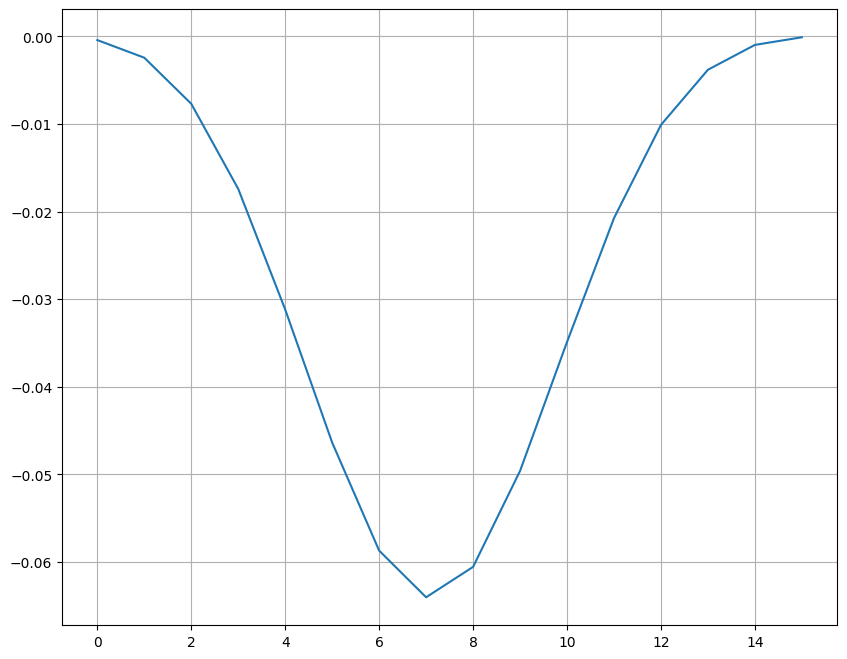

In [10]:
plt.figure(figsize=(10,8))
plt.plot(h)
plt.grid()

Hasil dari code ini adalah plot dari koefisien filter FIR yang telah dihitung menggunakan optimisasi numerik. Plot ini memberikan informasi tentang karakteristik filter FIR yang dihasilkan, yang penting untuk pemahaman tentang bagaimana filter akan berfungsi dalam aplikasi praktis.

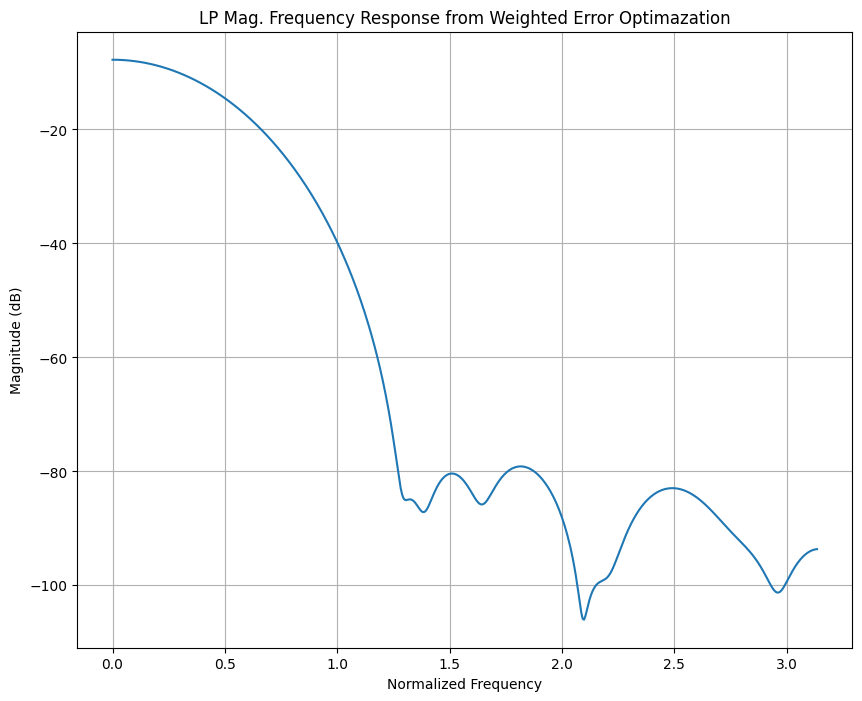

In [11]:
omega, H =signal.freqz(h)
plt.figure(figsize=(10,8))
plt.plot(omega, 20*np.log10(abs(H)+1e-6))
plt.xlabel('Normalized Frequency')
plt.ylabel('Magnitude (dB)')
plt.title('LP Mag. Frequency Response from Weighted Error Optimazation')
plt.grid()

Hasil dari code ini adalah plot dari respons frekuensi dari filter FIR yang telah dioptimalkan berdasarkan kesalahan yang dihitung sebelumnya. Plot ini memberikan informasi tentang bagaimana filter FIR tersebut merespon terhadap berbagai frekuensi, yang berguna untuk analisis dan desain filter.

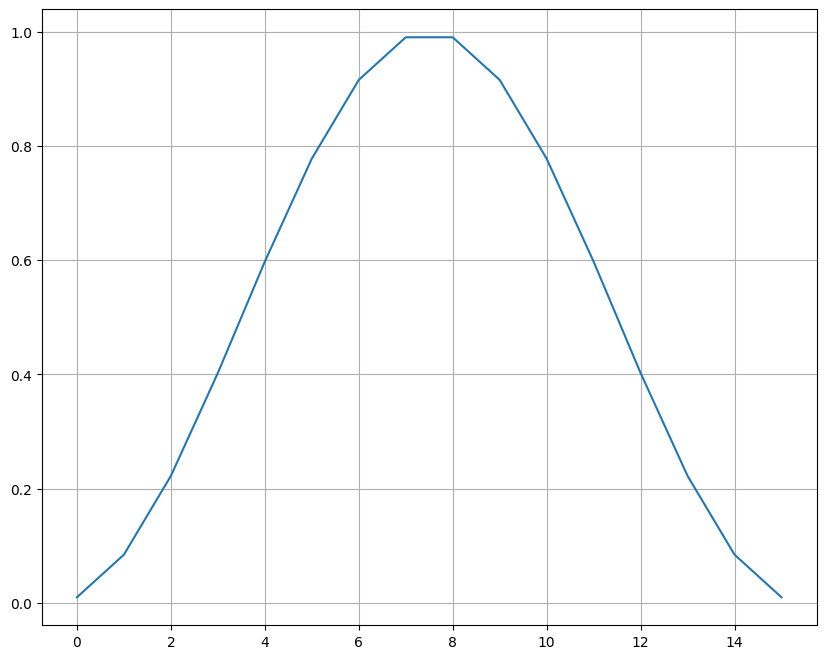

In [12]:
h=0.5-0.5*np.cos(2*np.pi/16*(np.arange(16)+0.5))

plt.figure(figsize=(10,8))
plt.plot(h)
plt.grid()

Hasil dari code ini adalah plot dari koefisien filter FIR yang dihasilkan menggunakan formula jendela Hamming. Jendela Hamming biasanya digunakan untuk merancang filter FIR dengan meminimalkan efek sisi-lobenya. Plot menunjukkan karakteristik respons impuls dari filter FIR tersebut.

In [13]:
def freqz(x):
    # get frequency bins and according magnitude values
    f, H = signal.freqz(x)

    #normalized frequency
    fNorm = f/np.pi

    # magnitude in dB
    hdB = 20 * np.log10(abs(H)+1e-5) #"+1e-5" avoids log10(0)!

    # open figure
    plt.figure(figsize=(10,8))

    plt.subplot(211)
    plt.title('Magnitude')
    plt.plot(f, hdB, 'b')
    plt.axis([0,3.14,np.min(hdB)-1,np.max(hdB)+1])
    plt.grid(True)
    plt.xlabel('Normalized Frequency (rad/sample)')
    plt.ylabel('Magnitude (dB)')

    plt.subplot(212)
    plt.title('Phase')
    angles = np.unwrap(np.angle(H))
    anglesGrad = (360 * angles)/(2*np.pi)
    plt.plot(f, anglesGrad, 'b')
    plt.axis([0,3.14,np.min(anglesGrad),np.max(anglesGrad)])
    plt.grid(True)
    plt.xlabel('Normalized Frequency (rad/sample)')
    plt.ylabel('Phase (degrees)')
    plt.tight_layout()

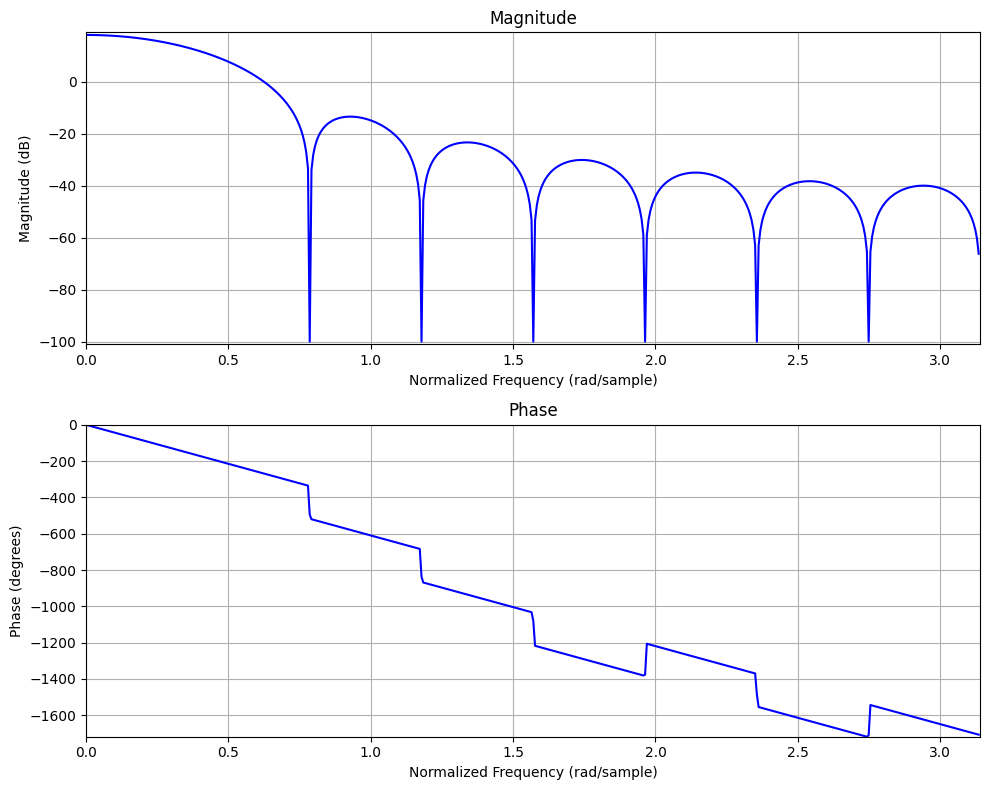

In [14]:
freqz(h)

Hasil dari fungsi ini adalah dua plot yang menunjukkan respons frekuensi dari filter FIR dalam domain magnitude (dB) dan fase (derajat).

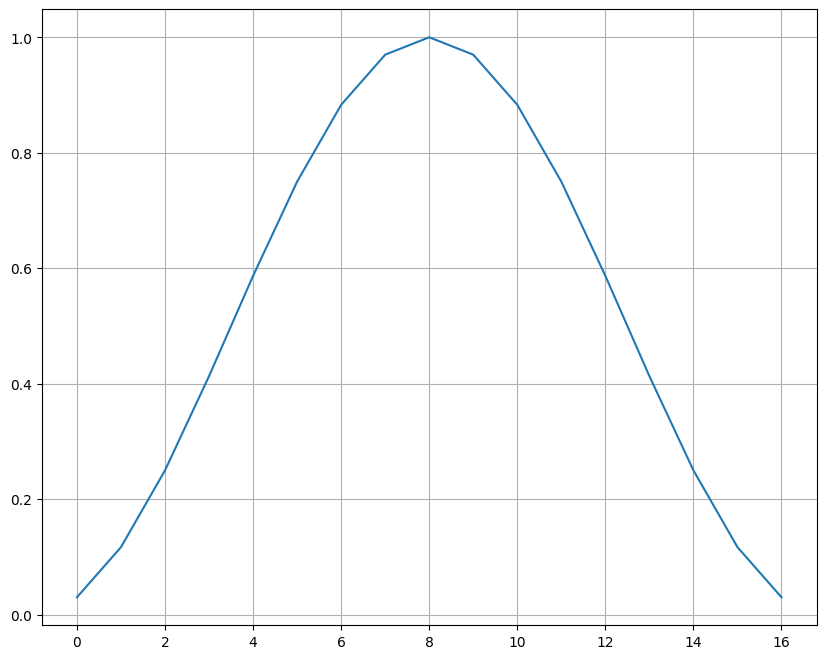

In [15]:
h=0.5-0.5*np.cos(2*np.pi/18*(np.arange(17)+1))

plt.figure(figsize=(10,8))
plt.plot(h)
plt.grid()

Hasil dari code ini adalah plot dari koefisien filter FIR yang dihasilkan menggunakan formula jendela Hamming yang dimodifikasi. Plot menunjukkan respons impuls dari filter FIR tersebut.

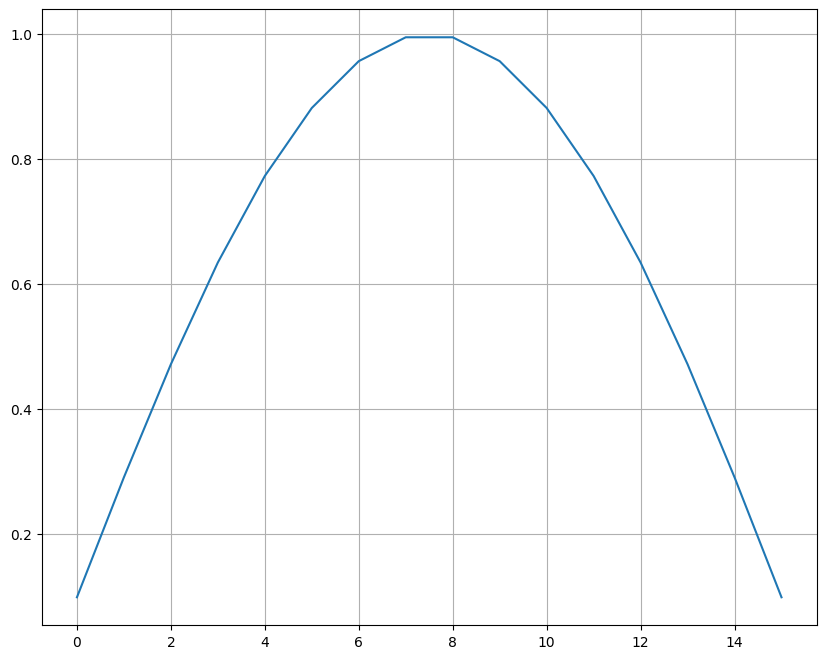

In [16]:
s=np.sin(np.pi/16*(np.arange(16)+0.5))

plt.figure(figsize=(10,8))
plt.plot(s)
plt.grid()

Hasil dari code ini adalah plot dari sinyal sinusoidal yang dihasilkan. Plot menunjukkan nilai sinyal sinusoidal pada setiap sampel. Dalam hal ini, sinyal tersebut memiliki frekuensi yang ditentukan oleh rumus yang digunakan dalam pembuatan sinyal.

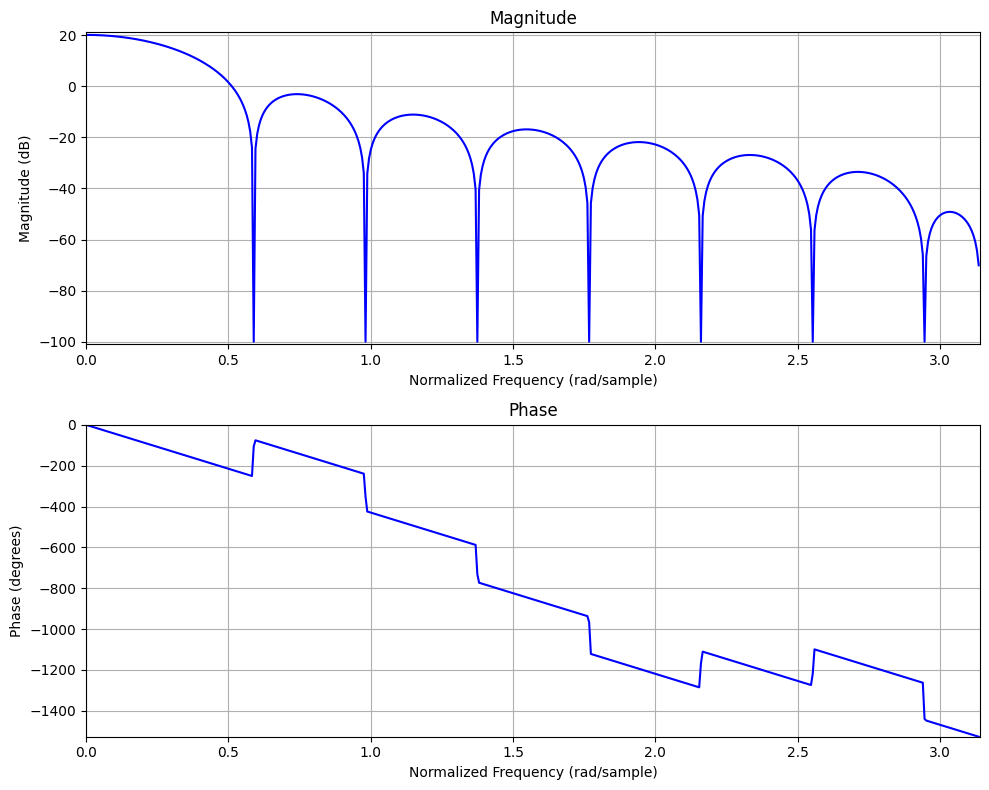

In [17]:
freqz(s)

Hasil dari fungsi ini adalah dua plot yang menunjukkan respons frekuensi dari sinyal FIR dalam domain magnitude (dB) dan fase (derajat).

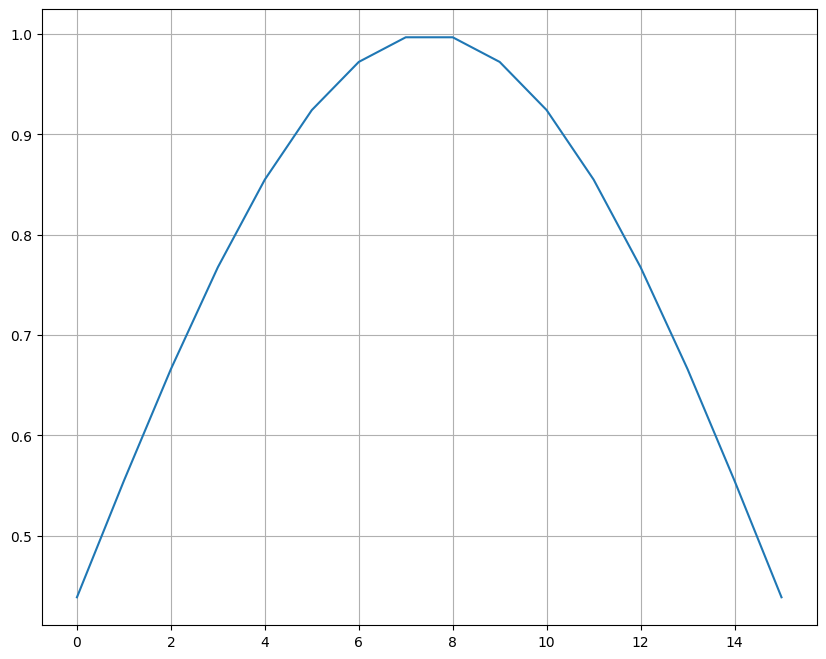

In [18]:
hk=np.kaiser(16,2)

plt.figure(figsize=(10,8))
plt.plot(hk)
plt.grid()

Hasil dari code ini adalah plot dari koefisien filter FIR yang dihasilkan menggunakan jendela Kaiser. Plot menunjukkan respons impuls dari filter FIR tersebut.

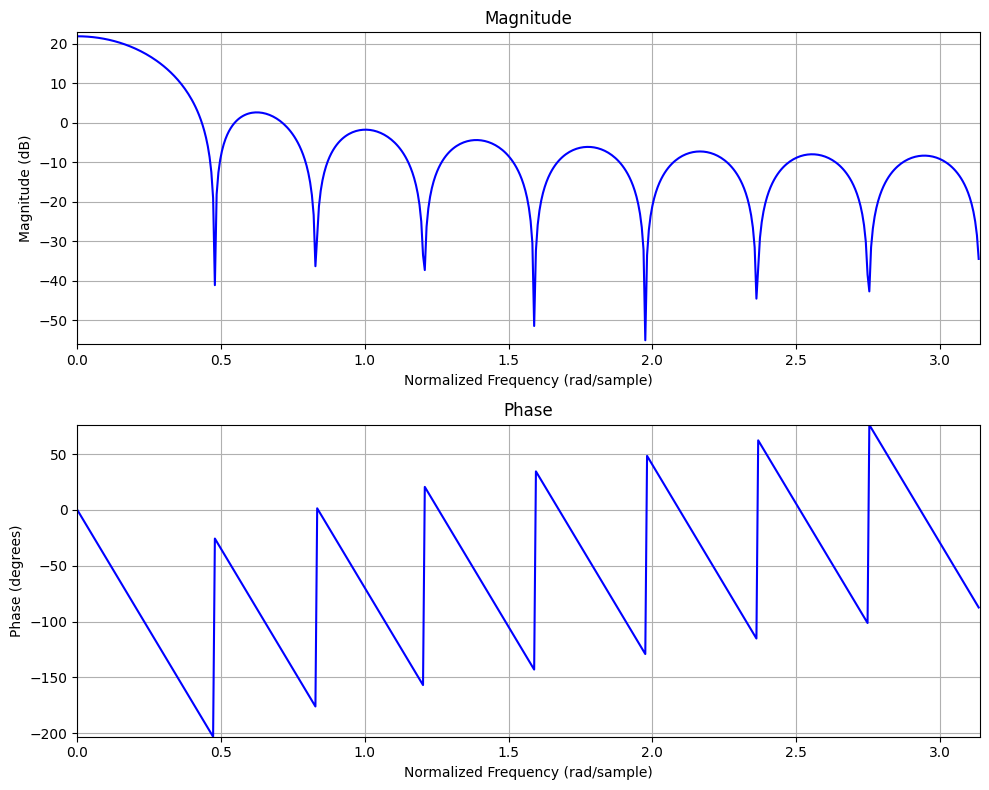

In [19]:
freqz(hk)

Hasil dari fungsi ini adalah dua plot yang menunjukkan respons frekuensi dari filter FIR yang dihasilkan menggunakan jendela Kaiser dalam domain magnitude (dB) dan fase (derajat).